In [3]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load and clean
df = pd.read_csv('email.csv', encoding='latin-1', names=['v1','v2'], usecols=[0,1], skiprows=1)
df = df.rename(columns={'v1':'label', 'v2':'text'})
df = df.dropna(subset=['label','text'])
df['label'] = df['label'].str.strip().map({'ham': 0, 'spam': 1})


In [7]:
print(df['label'].value_counts())


label
0    4825
1     747
Name: count, dtype: int64


In [9]:
#Train-Test Split
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
#TF‑IDF Text Vectorization
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)


In [13]:
#Train & Evaluate Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_preds = nb.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds, target_names=['Ham','Spam']))


Naive Bayes Accuracy: 0.968609865470852
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [15]:
#Train & Evaluate Support Vector Machine (SVM)
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
svm_preds = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds, target_names=['Ham','Spam']))


SVM Accuracy: 0.9865470852017937
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        Spam       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



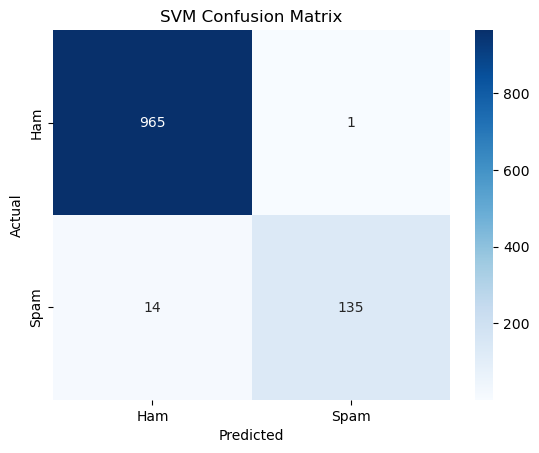

In [17]:
#Confusion Matrix Visualization
cm = confusion_matrix(y_test, svm_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()
